# Datetime Function Example

## Dependency Package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# read file to DataFrame to show example
df=pd.read_csv('../../data/partial_data.csv')
df['harvested_at'] = pd.to_datetime(df['harvested_at'], utc=True)

## get_unit

In [5]:
# helper function for all the functions below
def get_unit(unit="day"):

    """
    For a given unit type, return the function that get the 
    corresponding unit value of a datetime object.

    Parameters
    ----------
    unit : str
        The time unit for the returned function to get the corresponding value.
        The set of possible unit is:
        'year' : the year of the datetime object.
        'month' : the month of the datetime object.
        'day' : the day in month of the datetime object.
        'hour' : the hour of the datetime object.
        'minute' : the minute of the datetime object.
        'day_of_week' : the day in week of the datetime object, range in [0, 6].
        'day_of_year' : the day in year of the datetime object, range in [0, 355].

    Returns
    -------
    get_time : function
        The function to get corresponding unit time from datetime object.
    """

    if unit=="year":
        get_time = lambda x:x.year
    elif unit=="month":
        get_time = lambda x:x.month
    elif unit=="day":
        get_time = lambda x:x.day
    elif unit=="hour":
        get_time = lambda x:x.hour
    elif unit=="minute":
        get_time = lambda x:x.minute
    elif unit=="day_of_week":
        get_time = lambda x:x.day_of_week
    elif unit=="day_of_year":
        get_time = lambda x:x.day_of_year
    else:
        raise ValueError("Wrong Parameter")
    return get_time

## time_dist

In [13]:
def time_dist(df, column, unit="day"):

    """
    For a given column that is in datetime datatype, plot the time distribution in the given unit.

    Parameters
    ----------
    df : DataFrame
        The data frame that contains target datetime column.
    column: str
        The column name of the target datetime column.
    unit : str, default 'day'
        Please refer to the get_unit function.
    """
    
    get_time = get_unit(unit)
    sns.histplot(x=df[column].apply(get_time))
    plt.title(f"time distribution in {unit}")
    plt.xlabel(unit)
    plt.show()

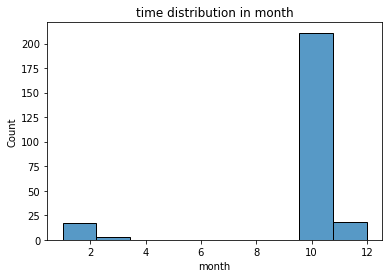

In [14]:
time_dist(df, "harvested_at", unit="month")

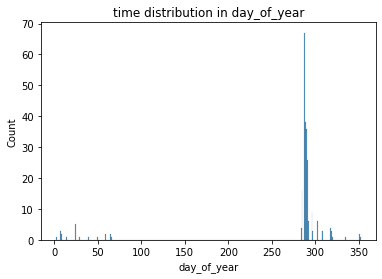

In [15]:
time_dist(df, "harvested_at", unit="day_of_year")

## time_dist_along

In [16]:
def time_dist_along(df, column, time_col, unit="day"):

    """
    For a given datetime column and a numerical column, plot the 
    time distribution in the given unit along the numeric column.

    Parameters
    ----------
    df : DataFrame
        The data frame that contains target datetime column.
    column : str
        The column name of the numerical column.
    time_col: str
        The column name of the target datetime column.
    unit : str, default 'day'
        Please refer to the get_unit function.
    """

    get_time = get_unit(unit)
    sns.relplot(x=df[time_col].apply(get_time), y=df[column], aspect=1.5)
    plt.title(f'{unit} distribution along {column}')
    plt.xlabel(unit)

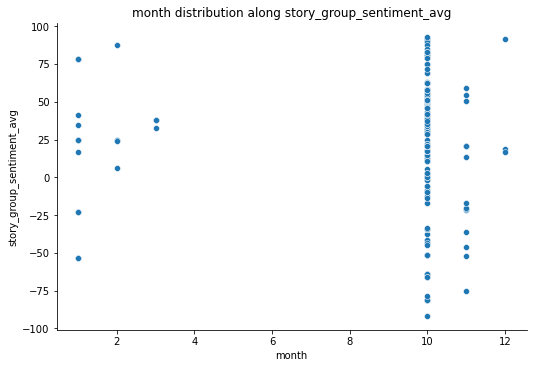

In [17]:
time_dist_along(df, "story_group_sentiment_avg", 'harvested_at', unit="month")

## agg_time_along

In [19]:
def agg_time_along(df, column, time_col, start, end, agg_unit="day_of_year"):

    """    
    For a given DataFrame contains datetime column and another numeric column, in the given time interval, 
    groupby the datetime column with the given unit and aggregate the numeric column by mean value, 
    then with time as x axis, plot the trend line of the numeric column value.

    Parameters
    ----------
    df : DataFrame
        The DataFrame that contains the datetime column and numerical column.
    column : str
        The column name of the numerical column.
    time_col : str
        The column name of the datetime column.
    start : str
        The string in datetime format that indicates the start time of the selected time interval.
    end : str
        The string in datetime format that indicates the end time of the selected time interval
    agg_unit : str
        The unit of the datetime column to aggregate and plot distribution. 
        Please refer to get_unit for potential values.
    """
    start = pd.to_datetime(start, utc=True)
    end = pd.to_datetime(end, utc=True)
    idx = df[time_col][(df[time_col]>=start) & (df[time_col]<=end)].index
    new_df = df[[time_col, column]].copy()
    
    get_time = get_unit(agg_unit)
    new_df.loc[:,agg_unit] = df[time_col].apply(get_time)

    sns.lineplot(x=new_df.loc[idx,[agg_unit,column]].groupby([agg_unit]).mean()[column].index, y=new_df.loc[idx,[agg_unit,column]].groupby([agg_unit]).mean()[column])

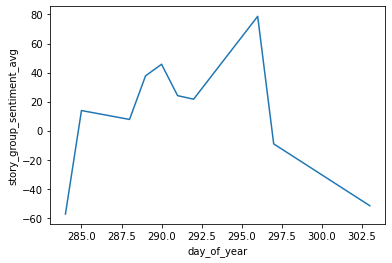

In [20]:
agg_time_along(df, "story_group_sentiment_avg", 'harvested_at', start="2018-10-1", end="2018-10-31")